In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Импортируйте датасет в ноутбук средствами pandas
---

In [51]:
df = pd.read_csv('./wishes_character_event.csv')
df

,date,item,type,quality
0,2020-10-01,barbara,character,4
1,2020-10-01,NaN,weapon,3
2,2020-10-01,NaN,weapon,3
3,2020-10-01,NaN,weapon,3
4,2020-10-01,NaN,weapon,3
...,...,...,...,...
1181,2022-11-18,black tassel,weapon,3
1182,2022-11-18,magic guide,weapon,3
1183,2022-11-18,sacrificial greatsword,weapon,3
1184,2022-11-19,debate club,weapon,3


Посмотрите на первые 5 строк датафрейма
---

In [52]:
df.head(5)

,date,item,type,quality
0,2020-10-01,barbara,character,4
1,2020-10-01,NaN,weapon,3
2,2020-10-01,NaN,weapon,3
3,2020-10-01,NaN,weapon,3
4,2020-10-01,NaN,weapon,3


Выведите информацию о типах данных в наборе, а также основную статистическую информацию о данных

In [53]:
df.head(5).info()
df.head(5).describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     5 non-null      object
 1   item     1 non-null      object
 2   type     5 non-null      object
 3   quality  5 non-null      int64 
dtypes: int64(1), object(3)
memory usage: 288.0+ bytes


,quality
count,5.000000
mean,3.200000
std,0.447214
min,3.000000
25%,3.000000
50%,3.000000
75%,3.000000
max,4.000000


Удалите дубликаты строк

In [54]:
df.head(5).drop_duplicates()

,date,item,type,quality
0,2020-10-01,barbara,character,4
1,2020-10-01,NaN,weapon,3


Посмотрите на последние 5 строк датафрейма
---

In [55]:
df.tail(5)

,date,item,type,quality
1181,2022-11-18,black tassel,weapon,3
1182,2022-11-18,magic guide,weapon,3
1183,2022-11-18,sacrificial greatsword,weapon,3
1184,2022-11-19,debate club,weapon,3
1185,2022-11-19,raven bow,weapon,3


Выведите информацию о типах данных в наборе, а также основную статистическую информацию о данных

In [56]:
df.tail(5).info()
df.tail(5).describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 1181 to 1185
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     5 non-null      object
 1   item     5 non-null      object
 2   type     5 non-null      object
 3   quality  5 non-null      int64 
dtypes: int64(1), object(3)
memory usage: 292.0+ bytes


,quality
count,5.0
mean,3.0
std,0.0
min,3.0
25%,3.0
50%,3.0
75%,3.0
max,3.0


Удалите дубликаты строк

In [57]:
df.tail(5).drop_duplicates()

,date,item,type,quality
1181,2022-11-18,black tassel,weapon,3
1182,2022-11-18,magic guide,weapon,3
1183,2022-11-18,sacrificial greatsword,weapon,3
1184,2022-11-19,debate club,weapon,3
1185,2022-11-19,raven bow,weapon,3


Удалите из датафрейма (если есть соответствующие поля) такие поля, как ID объектов. Переименуйте произвольное поле датафрейма.
---

In [58]:
df = df.rename(columns={'quality': 'rarity'})
df

,date,item,type,rarity
0,2020-10-01,barbara,character,4
1,2020-10-01,NaN,weapon,3
2,2020-10-01,NaN,weapon,3
3,2020-10-01,NaN,weapon,3
4,2020-10-01,NaN,weapon,3
...,...,...,...,...
1181,2022-11-18,black tassel,weapon,3
1182,2022-11-18,magic guide,weapon,3
1183,2022-11-18,sacrificial greatsword,weapon,3
1184,2022-11-19,debate club,weapon,3


С помощью библиотек matplotlib, seaborn и pandas постройте следующие диаграммы:
---

гистограмму распределения любого числового признака

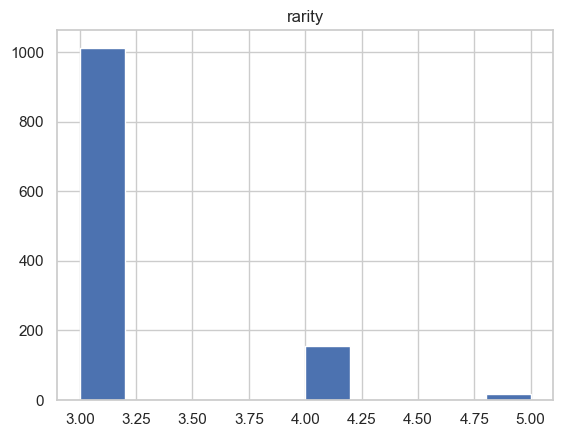

In [59]:
df.hist('rarity')
plt.savefig('rarity_hist.png')

диаграмму «ящик с усами» для любого числового признака

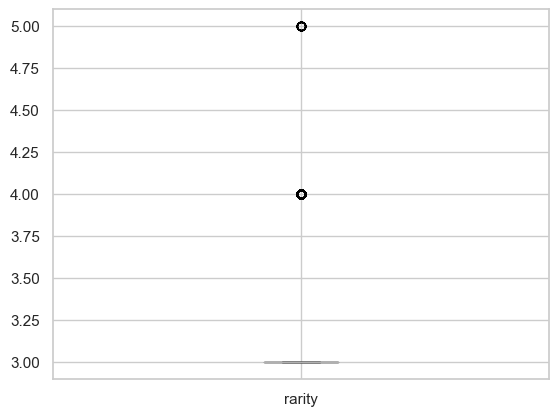

In [60]:
df.boxplot('rarity')
plt.savefig('rarity_boxplot.png')

круговую диаграмму

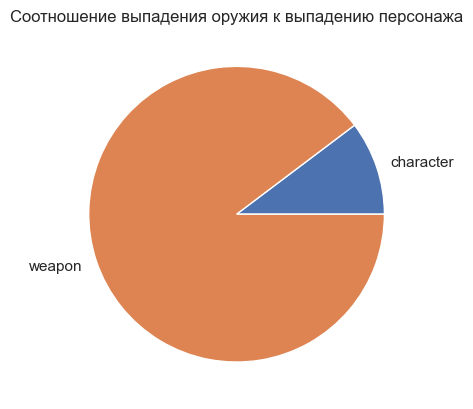

In [61]:
plt.pie([df.groupby(['type']).size().to_frame().loc['character'][0], df.groupby(['type']).size().to_frame().loc['weapon'][0]], labels=['character', 'weapon'])
plt.title("Соотношение выпадения оружия к выпадению персонажа")
plt.savefig('character_to_weapon_pie.png')

тепловую карту со значениями взаимной корреляции между всеми парами признаков набора данных

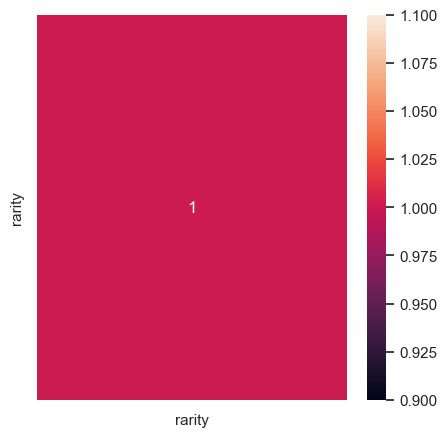

In [62]:
buf = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(buf, annot=True, ax=ax)
plt.savefig('heatmap.png')

диаграмму countplot с группировкой по двум номинативным признакам

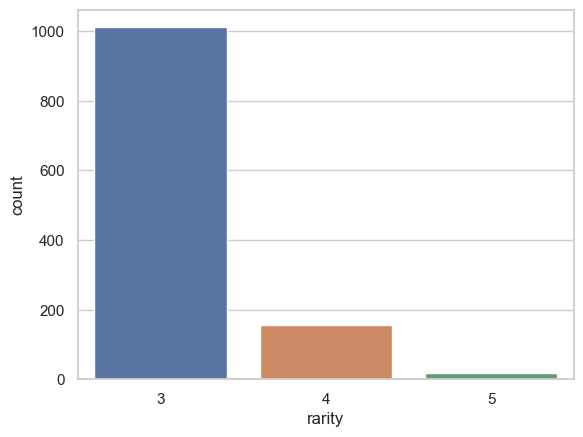

In [63]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df["rarity"])
plt.savefig('rarity_countplot.png')

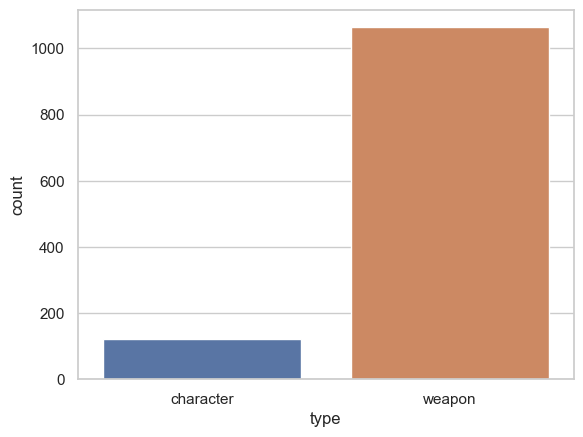

In [64]:
sns.countplot(x=df["type"])
plt.savefig('type_countplot.png')

Проверьте наличие пропусков в данных. Если в каких либо столбцах присутствуют пропуски - заполните их в соответствии со следующим правилом: если значением признака является целое число, заполните значением медианы по данному столбцу; если значением признака является действительное число, заполните средним значением по данному столбцу; иначе заполните значением моды по данному столбцу.
---

In [65]:
buf = pd.isna(df)
buf

,date,item,type,rarity
0,False,False,False,False
1,False,True,False,False
2,False,True,False,False
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
1181,False,False,False,False
1182,False,False,False,False
1183,False,False,False,False
1184,False,False,False,False


In [66]:
df['item'] = df['item'].fillna(df['item'].mode()[0])
df

,date,item,type,rarity
0,2020-10-01,barbara,character,4
1,2020-10-01,magic guide,weapon,3
2,2020-10-01,magic guide,weapon,3
3,2020-10-01,magic guide,weapon,3
4,2020-10-01,magic guide,weapon,3
...,...,...,...,...
1181,2022-11-18,black tassel,weapon,3
1182,2022-11-18,magic guide,weapon,3
1183,2022-11-18,sacrificial greatsword,weapon,3
1184,2022-11-19,debate club,weapon,3


Выберите произвольный числовой признак, с помощью среза данных выберите не более 200 значений соответствующего признака. Проверьте полученную выборку с помощью normaltest на нормальность распределения.
---

In [67]:
buf = df['rarity'][:200]
stats.normaltest(buf)

NormaltestResult(statistic=113.89737624464556, pvalue=1.8513946177610255e-25)

Выполните one-hot кодирование всех категориальных признаков
---

In [68]:
pd.get_dummies(df)

,rarity,date_2020-10-01,date_2020-10-20,date_2020-10-21,date_2020-11-11,date_2020-11-12,date_2020-12-02,date_2020-12-23,date_2020-12-24,date_2021-01-13,...,item_thrilling tales of dragon slayers,item_xiangling,item_xianling,item_xiao,item_xingqiu,item_xinyan,item_yae miko,item_yun jin,type_character,type_weapon
0,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1182,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1183,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1184,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [69]:
df.to_csv('processed_df.csv')